In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

# function to perform post-hoc test
import statsmodels.stats.multicomp as mc


In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# 1. You were recently hired as a business analyst in a top sports company. The senior management team has asked you to come up with metrics with which they can gauge which team will win the upcoming La Liga cup (Football tournament). The given data set contains information on all the teams that have so far participated in all the past tournaments. It has data about how many goals each team scored, conceded; how many times they came within the first 6 positions, how many seasons they have qualified, their best position in the past, etc. You are required to do the following:

In [3]:
Laliga=pd.read_csv('Laliga.csv')

Laliga.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [4]:
# replacing column names with 0th row values and droping 0th row from table

header_row=0

Laliga.columns = Laliga.iloc[header_row]

Laliga = Laliga.drop(header_row)

Laliga = Laliga.reset_index(drop=True)

Laliga.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [5]:
#checking for number of null values present in columns

Laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Pos            61 non-null     object
 1   Team           61 non-null     object
 2   Seasons        61 non-null     object
 3   Points         61 non-null     object
 4   GamesPlayed    61 non-null     object
 5   GamesWon       61 non-null     object
 6   GamesDrawn     61 non-null     object
 7   GamesLost      61 non-null     object
 8   GoalsFor       61 non-null     object
 9   GoalsAgainst   61 non-null     object
 10  Champion       61 non-null     object
 11  Runner-up      61 non-null     object
 12  Third          61 non-null     object
 13  Fourth         61 non-null     object
 14  Fifth          61 non-null     object
 15  Sixth          61 non-null     object
 16  T              61 non-null     object
 17  Debut          61 non-null     object
 18  Since/LastApp  61 non-null     o

In [6]:
# checking for other symbols other than numbers and strings

Laliga.head(31)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,-,-,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,-,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,-,2,3,4,4,14,1932-33,2015-16,1


In [7]:
Laliga.replace('-','0',inplace=True)

Laliga.head(31)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932-33,2015-16,1


## A) Which are the teams which started playing between 1930-1980?

In [8]:
t=[]

for i in range(0,len(Laliga)):
    k=int(Laliga['Debut'][i][0:4])
    if (k>1930) and (k<1980):
        t.append(Laliga['Team'][i])
        
print('Teams started playing between 1930-1980 are:',t,sep='\n\n')


Teams started playing between 1930-1980 are:

['Valencia', 'Sevilla', 'Zaragoza', 'Real Betis', 'Deportivo La Coruna', 'Celta Vigo', 'Valladolid', 'Sporting Gijon', 'Osasuna', 'Malaga', 'Oviedo', 'Mallorca', 'Las Palmas', 'Granada', 'Rayo Vallecano', 'Elche', 'Hercules', 'Tenerife', 'Murcia', 'Levante', 'Salamanca', 'Sabadell', 'Cadiz', 'Castellon', 'Cordoba', 'Recreativo', 'Burgos CF', 'Pontevedra', 'Gimnastic', 'Alcoyano', 'Jaen', 'AD Almeria', 'Lleida', 'Condal', 'Atletico Tetuan', 'Cultural Leonesa']


## B) Which are the top 5 teams in terms of points?

In [9]:
Laliga1=Laliga[['Team','Points']]

Laliga1['Points']=Laliga1['Points'].astype('int')

Laliga1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Team    61 non-null     object
 1   Points  61 non-null     int32 
dtypes: int32(1), object(1)
memory usage: 860.0+ bytes


In [10]:
# top 5 teams in terms of points

Laliga1['Points_Rank'] = Laliga1['Points'].rank(ascending = 0)

Teams=Laliga1['Team'].head(5)

Teams

0        Real Madrid
1          Barcelona
2    Atletico Madrid
3           Valencia
4    Athletic Bilbao
Name: Team, dtype: object

## C)	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)

In [11]:
Laliga.head(20)

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
0,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
1,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
2,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
3,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
4,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
5,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
6,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994-95,3
7,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
8,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939-40,2012-13,2
9,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932-33,2015-16,1


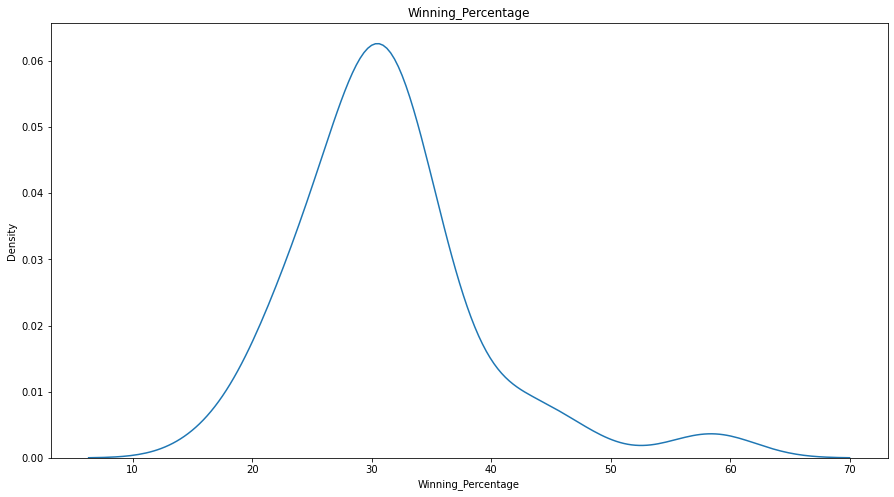

In [13]:
Laliga2=Laliga[['Team','GamesPlayed','GamesWon']]

Laliga2[['GamesPlayed','GamesWon']]=Laliga2[['GamesPlayed','GamesWon']].astype('int')

Laliga2['Winning_Percentage']=(Laliga2['GamesWon']/Laliga2['GamesPlayed'])*100

Laliga2.dropna(axis=0,inplace=True)

sns.kdeplot(data=Laliga2,x='Winning_Percentage')      # distribution

plt.title('Winning_Percentage')

plt.show()

In [14]:
# top 5 teams interms of winning percentage

Laliga2['Winning_Percentage_Rank']=Laliga2['Winning_Percentage'].rank(ascending = 0)

Teams1=Laliga2['Team'].head(5)

Teams1.head(5)

0        Real Madrid
1          Barcelona
2    Atletico Madrid
3           Valencia
4    Athletic Bilbao
Name: Team, dtype: object

## D)	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [15]:
Laliga3=Laliga[['Team','GamesPlayed','GamesWon','BestPosition']]

Laliga3[['GamesPlayed','GamesWon','BestPosition']]=Laliga3[['GamesPlayed','GamesWon','BestPosition']].astype('int')

Laliga3['Winning_Percentage']=(Laliga3['GamesWon']/Laliga3['GamesPlayed'])*100

Laliga3.dropna(axis=0,inplace=True)

Laliga3.head(5)

,Team,GamesPlayed,GamesWon,BestPosition,Winning_Percentage
0,Real Madrid,2762,1647,1,59.630702
1,Barcelona,2762,1581,1,57.241130
2,Atletico Madrid,2614,1241,1,47.475134
3,Valencia,2664,1187,1,44.557057
4,Athletic Bilbao,2762,1209,1,43.772629


we need to perform two sample t-test for checking if there is a significant difference in the winning percentage for teams (1-3) and teams (4-7)

In [41]:
sample1=[Laliga3['Winning_Percentage'][i] for i in Laliga3['BestPosition'].index if Laliga3['BestPosition'][i] in (1,2,3)]   #winning percentage of bestposition (1-3) teams---sample1

sample2=[Laliga3['Winning_Percentage'][i] for i in Laliga3['BestPosition'].index if Laliga3['BestPosition'][i] in (4,5,6,7)]  #winning percentage of bestposition (4-7) teams---sample2

In [48]:
# before performing t-test we need to check for normality and equality of variance of data


stat1, p_value = shapiro(sample1+sample2)


stat2, p_value1 = stats.levene(sample1,sample2)

# print the test statistic and corresponding p-value 
print("Levene's P-Value:", p_value1)

# print the corresponding p-value 
print("Shapiro's P-Value:", p_value)

Levene's P-Value: 0.0055024902317928875
Shapiro's P-Value: 2.7973458145424956e-06


Since P_value from shapiro and levene is less than 0.05, therefore assumptions for two sample t-test is not satisfied. So, in this case we need to go to wilcoxin rank sum test (non parameteric test)

In [50]:
#wilcoxin rank sum test

#H0: median1-median2=0  1--sample1, 2--sample2
#Ha: median1-median2!=0
# let us assume alpha=0.05

from scipy.stats import ranksums

w,p=ranksums(sample1,sample2)

print('P_value for two tailed test is:',p)

P_value for two tailed test is: 7.781857739836886e-07


As p_value is less than 0.05 (alpha), we reject null hypothesis, therefore there is a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7

# 2) A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.

## a)Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [54]:
sample_mean=140

sample_sd=25

sample_size=200

estimated_standard_error=sample_sd/np.sqrt(sample_size)

print("Estimated Standard Error",round(estimated_standard_error,2))

Estimated Standard Error 1.77


standard error of 1.77, indicates sample mean of 140 mm Hg is 1.77mm Hg from Population mean

## b) Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [57]:
sample_sd=25

sample_size=200

sample_mean=140

# 95% confidence interval for the population mean is

interval=stats.norm.interval(0.95,loc=sample_mean,scale=sample_sd/np.sqrt(sample_size))

print('95% confidence interval of sample size 200 for the population mean is',interval)

95% confidence interval of sample size 200 for the population mean is (136.5352404391258, 143.4647595608742)


## c) Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [58]:
sample_sd=25

sample_size=100

sample_mean=140

# 95% confidence interval for the population mean is

interval1=stats.norm.interval(0.95,loc=sample_mean,scale=sample_sd/np.sqrt(sample_size))

print('95% confidence interval of sample size 100 for the population mean is',interval1)

95% confidence interval of sample size 100 for the population mean is (135.10009003864985, 144.89990996135015)


## d)Which of the two above intervals are wider?

95% confidence interval of sample size 100 for the population mean is wider compared to sample size of 200

## e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.

As the sample size increases, the sample data contains more percentage of data, that is present in population, therefore sample mean comes closer to population mean, as estimated standard error represents how far is your sample mean from population mean, this farness reduces as sample mean becomes closer to population mean , which results in decrease in estimated standard error.

# 3) Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. Therefore, the research group at Par has been investigating a new golf ball coating designed to resist cuts and provide a more durable ball. The tests with the coating have been promising.

# One of the researchers voiced concern about the effect of the new coating on driving distances. Par would like the new cut-resistant ball to offer driving distances comparable to those of the current-model golf ball. To compare the driving distances for the two balls, 40 balls of both the new and current models were subjected to distance tests. The testing was performed with a mechanical hitting machine so that any difference between the mean distances for the two models could be attributed to a difference in the design. The results of the tests, with distances measured to the nearest yard, are contained in   the data set “Golf”.


In [62]:
Golf=pd.read_csv('Golf.csv')

Golf.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


## A) Formulate and present the rationale for a hypothesis test that Par could use to compare the driving distances of the current and new golf balls.

# Hypothesis Formulation and Testing
 
The level of significance (Alpha) = 0.05

The sample size N = 40 which is sufficiently large for a Z stat Test.

But since the population standard deviation (Sigma) is unknown, we have to use a T stat Test.

Since the sample is different for both Sampling tests, we have N+N-2 degrees of freedom = 78

Since the sole purpose of the test is to check whether there is any effect on driving distances due to the new coating, we could prefer a Two Tailed T Test.

In [66]:
# before performing two sample t test , let us check normality and equality of variance test of current and new balls

stat1, p_value1 = shapiro(list(Golf['Current'])+list(Golf['New']))

stat2, p_value2=stats.levene(Golf['Current'],Golf['New'])

print('Normality test P-Value',p_value1)

print('Equality of variance test P-Value',p_value2)

Normality test P-Value 0.1566435992717743
Equality of variance test P-Value 0.6147759523331309


As both Normality and equality of variance test p_value is greater than 0.05, therefore we can perform two sample t-test.

The null and alternative hypothesis is:

H<sub>0</sub>: New coating does not have effect on driving distances ($\mu_{d} = 0$)<br>
H<sub>1</sub>: New coating does have significant effect on driving distances($\mu_{d} \neq 0$)

## B) Analyze the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?

In [67]:
# let us assume alpha=0.05

t_val = np.abs(round(stats.t.isf(q = 0.05/2, df = 78), 2))

print('Critical value for two-tailed t-test:', t_val)

Critical value for two-tailed t-test: 1.99


i.e. if t is less than -1.99 or greater than 1.99 then we reject the null hypothesis.

In [69]:
# use 'ttest_ind()' to calculate the test statistic and corresponding p-value for 2 sample test
# pass the sample data to the parameter, 'a' and 'b'
t_stat, p_val = stats.ttest_ind(a = Golf['Current'], b = Golf['New'])

# print the test statistic value and corresponding p-value
print('Test Statistic:', t_stat)
print('p-value:', p_val)

Test Statistic: 1.3283615935245678
p-value: 0.18793228491854663


We can see that the test statistic value is less than 1.99 and greater than -1.99, the p-value is greater than 0.05.Thus, we fail to reject (i.e. accept) the null hypothesis and conclude that,New coating does not have effect on driving distances.

However, our recommendation is that the test be carried out with a larger sample size covering number of golf courses (at least a five different) to improve the accuracy of the test results and negating any effect of one type of ground. Also, the results need to interpreted and future actions be planned with the understanding of other characteristics like size, shape, weight etc.

## C) What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for the difference between the means of the two population?

In [74]:
#95% confidence interval for the population mean of current model

sample_sd1=statistics.stdev(Golf['Current'])

sample_size1=40

sample_mean1=np.mean(Golf['Current'])

# 95% confidence interval for the population mean is

interval1=stats.norm.interval(0.95,loc=sample_mean1,scale=sample_sd1/np.sqrt(sample_size1))

print('95% confidence interval for Current balls driving distance mean is ',interval1)


95% confidence interval for Current balls driving distance mean is  (267.56247173951107, 272.9875282604889)


In [76]:
#95% confidence interval for the population mean of current model

sample_sd2=statistics.stdev(Golf['New'])

sample_size2=40

sample_mean2=np.mean(Golf['New'])

# 95% confidence interval for the population mean is

interval2=stats.norm.interval(0.95,loc=sample_mean2,scale=sample_sd2/np.sqrt(sample_size2))

print('95% confidence interval for New balls driving distance mean is ',interval2)


95% confidence interval for New balls driving distance mean is  (264.43297388933604, 270.56702611066396)


In [77]:
# 95% confidence interval for the difference between the means of the two population

# calculate pooled standard deviation
s = np.sqrt((((sample_size1-1)*sample_sd1**2) + ((sample_size2-1)*sample_sd2**2)) / (sample_size1 + sample_size2 - 2))

# calculate the 95% confidence interval for the population mean
# pass the degrees of freedom to the parameter, 'df' 
# pass the difference in the sample means to the parameter, 'loc'
# pass the scaling factor s*(1/n1 + 1/n2)^(1/2) to the parameter, 'scale'
interval3 = stats.t.interval(0.95, df =sample_size1+sample_size2 - 2, loc = sample_mean1 - sample_mean2, scale = s * np.sqrt(1/sample_size1 + 1/sample_size2))

print('95% confidence interval for the difference between the means of the two population is', interval3)

95% confidence interval for the difference between the means of the two population is (-1.3839584057317742, 6.933958405731729)
